In [56]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
df = pd.read_csv('Titanic.csv')
df = df.drop(columns = ['Unnamed: 0','boat', 'body',
       'home.dest'])
df.head(16)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton
3,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton
4,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton
5,1st,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.549999,E12,Southampton
6,1st,1,"Andrews, Miss. Kornelia Theodos",female,63.0000,1,0,13502,77.958298,D7,Southampton
7,1st,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.000000,A36,Southampton
8,1st,1,"Appleton, Mrs. Edward Dale (Cha",female,53.0000,2,0,11769,51.479198,C101,Southampton
9,1st,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.504200,NaN,Cherbourg


In [58]:
df.age[df.age.isnull()] = df.age.dropna().mode().values
df.head(16)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton
3,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton
4,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton
5,1st,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.549999,E12,Southampton
6,1st,1,"Andrews, Miss. Kornelia Theodos",female,63.0000,1,0,13502,77.958298,D7,Southampton
7,1st,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.000000,A36,Southampton
8,1st,1,"Appleton, Mrs. Edward Dale (Cha",female,53.0000,2,0,11769,51.479198,C101,Southampton
9,1st,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.504200,NaN,Cherbourg


In [59]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(df,test_size = 0.3,random_state = 0)

In [60]:
sns.set_style('whitegrid')
train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
501,2nd,1,"Mellinger, Miss. Madeleine Viol",female,13.0,0,1,250644,19.5000,NaN,Southampton
588,2nd,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,Southampton
402,2nd,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,Cherbourg
1193,3rd,0,"Scanlan, Mr. James",male,24.0,0,0,36209,7.7250,NaN,Queenstown
686,3rd,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Queenstown


In [61]:
train_data.info()
print("*"*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 501 to 684
Data columns (total 11 columns):
pclass      916 non-null object
survived    916 non-null int64
name        916 non-null object
sex         916 non-null object
age         916 non-null float64
sibsp       916 non-null int64
parch       916 non-null int64
ticket      916 non-null object
fare        916 non-null float64
cabin       214 non-null object
embarked    914 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 85.9+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1139 to 88
Data columns (total 11 columns):
pclass      393 non-null object
survived    393 non-null int64
name        393 non-null object
sex         393 non-null object
age         393 non-null float64
sibsp       393 non-null int64
parch       393 non-null int64
ticket      393 non-null object
fare        392 non-null float64
cabin       81 non-null object
embarked    3

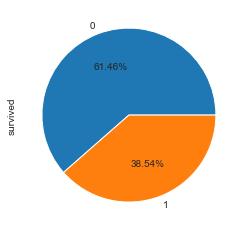

In [62]:
train_data['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

## boxplot

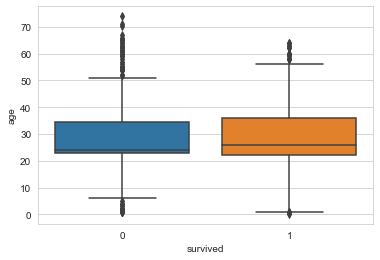

In [63]:
sns.boxplot(x='survived', y='age', data=train_data)

## kdeplot

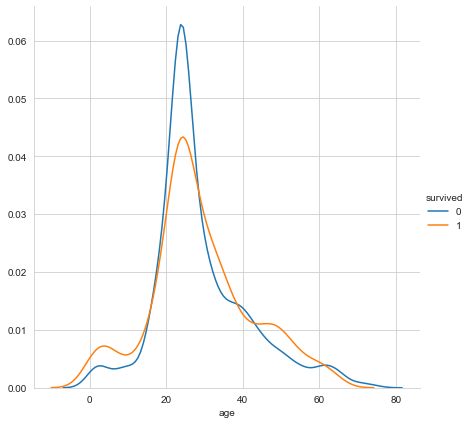

In [64]:
sns.FacetGrid(train_data, hue='survived',size=6) \
   .map(sns.kdeplot, 'age') \
    .add_legend()

## violinplot

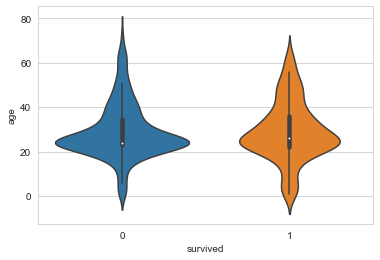

In [65]:

sns.violinplot(x='survived', y='age', data=train_data, size=6)

## FaceGrid

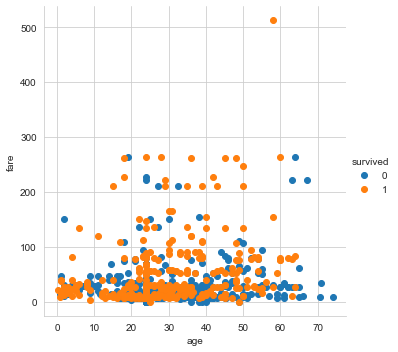

In [66]:
sns.FacetGrid(train_data, hue="survived", size=5) \
    .map(plt.scatter, "age", "fare") \
    .add_legend()

# Let's back to visualize the dataset

In [67]:
import random as rnd

# model packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


train_data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

In [68]:
train_data.describe()

,survived,age,sibsp,parch,fare
count,916.000000,916.000000,916.000000,916.000000,916.000000
mean,0.385371,29.040939,0.532751,0.371179,32.532050
std,0.486949,12.768550,1.125957,0.837508,47.416524
min,0.000000,0.166700,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,25.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,74.000000,8.000000,9.000000,512.329224


In [69]:
train_data[['pclass','survived']].groupby(['pclass'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,pclass,survived
0,1st,0.617391
1,2nd,0.436170
2,3rd,0.259036


Notice that survived max(0.617) matches to pclass=1st

In [70]:
train_data[['sex','survived']].groupby(['sex'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,sex,survived
0,female,0.728358
1,male,0.187608


female survived more than male

In [71]:
train_data[['sibsp','survived']].groupby(['sibsp'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,sibsp,survived
1,1,0.497797
2,2,0.375000
0,0,0.362602
3,3,0.333333
4,4,0.062500
5,5,0.000000
6,8,0.000000


In [72]:
train_data[['parch','survived']].groupby(['parch'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,parch,survived
3,3,0.800000
1,1,0.573913
2,2,0.455696
0,0,0.347949
4,4,0.250000
5,5,0.000000
6,6,0.000000
7,9,0.000000


We can see that parch and sibsp are not important than other features

### age with survived

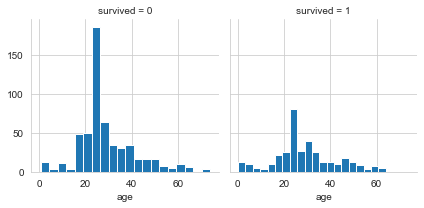

In [73]:
g = sns.FacetGrid(train_data,col='survived')
g.map(plt.hist,'age',bins=20)

### plcass with survived

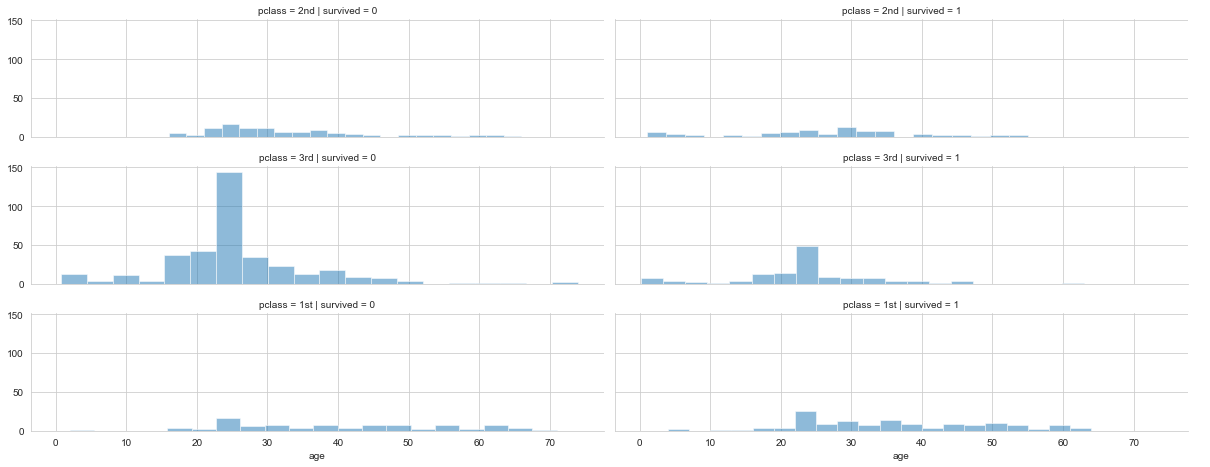

In [74]:
grid = sns.FacetGrid(train_data,col='survived',row='pclass',size=2.2,aspect=3.8)
grid.map(plt.hist,'age',alpha=.5,bins=20)
grid.add_legend()

### different embarked, different pclass, different sex with survived

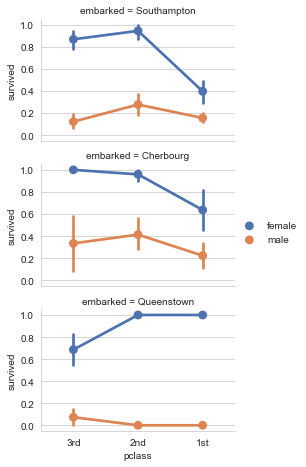

In [75]:
grid = sns.FacetGrid(train_data,row='embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'pclass','survived','sex',palette='deep',\
        hue_order=["female","male"])
grid.add_legend()

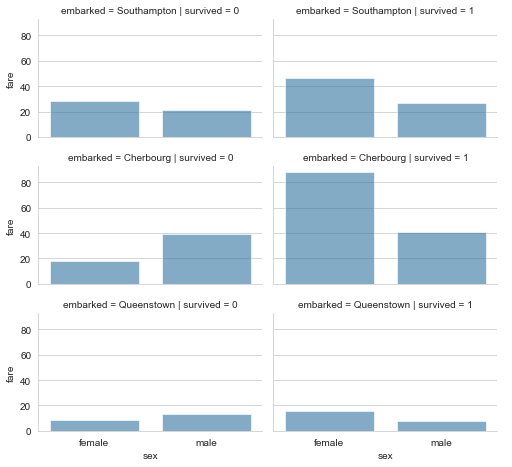

In [76]:
grid = sns.FacetGrid(train_data,row='embarked',col='survived',size=2.2,aspect=1.6)

grid.map(sns.barplot,'sex','fare',alpha=.6,ci=None,order=['female','male'])
grid.add_legend()

### different embarked, different pclass and different sex with survived

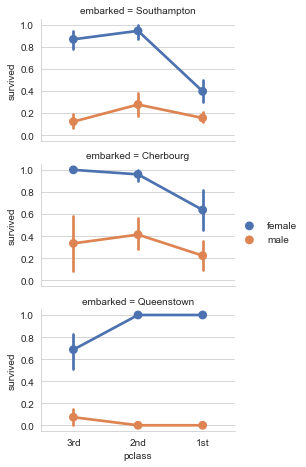

In [77]:
grid = sns.FacetGrid(train_data,row='embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'pclass','survived','sex',palette='deep',\
        hue_order=["female","male"])
grid.add_legend()

### different embarked, different sex and fare with survived

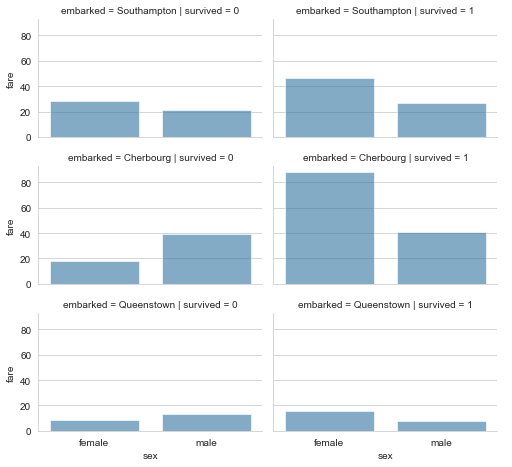

In [78]:
grid = sns.FacetGrid(train_data,row='embarked',col='survived',size=2.2,aspect=1.6)

grid.map(sns.barplot,'sex','fare',alpha=.6,ci=None,order=['female','male'])
grid.add_legend()

### remove "ticket" and "cabin"

In [79]:
train_data = train_data.drop(['ticket','cabin'],axis=1)
test_data = test_data.drop(['ticket','cabin'],axis=1)
combine = [train_data,test_data]

In [80]:
combine

[     pclass  survived                              name     sex      age  \
 501     2nd         1   Mellinger, Miss. Madeleine Viol  female  13.0000   
 588     2nd         1                 Wells, Miss. Joan  female   4.0000   
 402     2nd         1    Duran y More, Miss. Florentina  female  30.0000   
 1193    3rd         0                Scanlan, Mr. James    male  24.0000   
 686     3rd         1      Bradley, Miss. Bridget Delia  female  22.0000   
 971     3rd         0              Linehan, Mr. Michael    male  24.0000   
 117     1st         1    Francatelli, Miss. Laura Mabel  female  30.0000   
 540     2nd         1          Quick, Miss. Phyllis May  female   2.0000   
 294     1st         0          Thayer, Mr. John Borland    male  49.0000   
 261     1st         1   Silverthorne, Mr. Spencer Victo    male  35.0000   
 587     2nd         1       Wells, Master. Ralph Lester    male   2.0000   
 489     2nd         1   Louch, Mrs. Charles Alexander (  female  42.0000   

### create a Title to see the title of name has influence survived or not

In [81]:
for dataset in combine:
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.',expand=False)

test_crosstab = pd.crosstab(train_data['Title'],train_data['sex'])
print(test_crosstab)

sex       female  male
Title                 
Col            0     3
Countess       1     0
Dona           1     0
Dr             1     7
Jonkheer       0     1
Lady           1     0
Master         0    40
Miss         185     0
Mlle           2     0
Mme            1     0
Mr             0   523
Mrs          142     0
Ms             1     0
Rev            0     6
Sir            0     1


In [82]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col',\
                                                'Don','Dr','Major','Rev','Sir',\
                                                'Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
print(train_data[['Title','survived']].groupby(['Title'],as_index=False).mean())

    Title  survived
0  Master  0.500000
1    Miss  0.686170
2      Mr  0.158700
3     Mrs  0.776224
4    Rare  0.454545


### Add title with number

In [83]:
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title
501,2nd,1,"Mellinger, Miss. Madeleine Viol",female,13.0,0,1,19.5000,Southampton,2
588,2nd,1,"Wells, Miss. Joan",female,4.0,1,1,23.0000,Southampton,2
402,2nd,1,"Duran y More, Miss. Florentina",female,30.0,1,0,13.8583,Cherbourg,2
1193,3rd,0,"Scanlan, Mr. James",male,24.0,0,0,7.7250,Queenstown,1
686,3rd,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,7.7250,Queenstown,2


In [84]:
train_data = train_data.drop(['name'],axis=1)
test_data  = test_data.drop(['name'],axis=1)
combine = [train_data,test_data]
print(train_data.shape,test_data.shape)

(916, 9) (393, 9)


### replace male and female with 1 and 0

In [85]:
if __name__ == '__main__':
    for dataset in combine:
        dataset['sex'] = dataset['sex'].map({'female':1,'male':0}).astype(int)
train_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title
501,2nd,1,1,13.0,0,1,19.5000,Southampton,2
588,2nd,1,1,4.0,1,1,23.0000,Southampton,2
402,2nd,1,1,30.0,1,0,13.8583,Cherbourg,2
1193,3rd,0,0,24.0,0,0,7.7250,Queenstown,1
686,3rd,1,1,22.0,0,0,7.7250,Queenstown,2


### deal with missing value

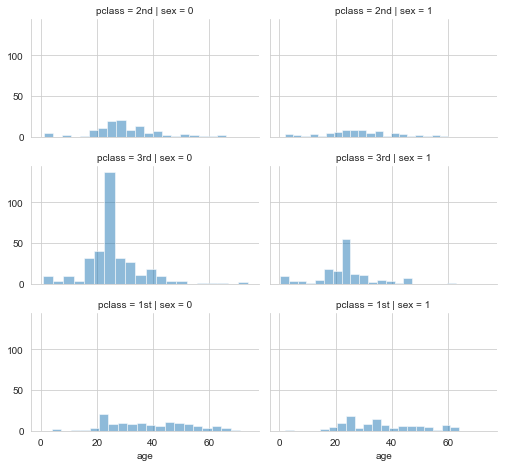

In [86]:
grid = sns.FacetGrid(train_data,row='pclass',col='sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'age',alpha=.5,bins=20)
grid.add_legend()
plt.show()

### divide age to 5 parts to see the relation with survived

In [87]:
# train_data['AgeBand']=pd.cut(train_data['age'],5) # divide to 5 parts
# train_data[['AgeBand','survived']].groupby(['AgeBand'],as_index=False).mean()\
# .sort_values(by='AgeBand',ascending=True)
# for dataset in combine:
#     dataset.loc[dataset['age']<=16,'age'] = 0
#     dataset.loc[(dataset['age']>16) & (dataset['age']<=32),'age']=1
#     dataset.loc[(dataset['age']>32) & (dataset['age']<=48),'age']=2
#     dataset.loc[(dataset['age']>48) & (dataset['age']<=64),'age']=3
#     dataset.loc[(dataset['age']>64),'age']=4
# train_data.head(5)

### combine sibsp and parch to do a relate comparison with survived


In [88]:
for dataset in combine:
    dataset['FamilySize'] = dataset['sibsp'] + dataset['parch'] + 1
train_data[['FamilySize','survived']].groupby(['FamilySize'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,FamilySize,survived
3,4,0.600000
2,3,0.560748
1,2,0.529070
0,1,0.318761
4,5,0.307692
5,6,0.235294
6,7,0.090909
7,8,0.000000
8,11,0.000000


### create a isAlone column

In [89]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1
train_data[['IsAlone','survived']].groupby(['IsAlone'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,IsAlone,survived
0,0,0.485014
1,1,0.318761


### remove familysize, sibsp and parch

In [90]:
train_data = train_data.drop(['parch','sibsp','FamilySize'],axis=1)
test_data = test_data.drop(['parch','sibsp','FamilySize'],axis=1)
combine = [train_data,test_data]
train_data.head()

,pclass,survived,sex,age,fare,embarked,Title,IsAlone
501,2nd,1,1,13.0,19.5000,Southampton,2,0
588,2nd,1,1,4.0,23.0000,Southampton,2,0
402,2nd,1,1,30.0,13.8583,Cherbourg,2,0
1193,3rd,0,0,24.0,7.7250,Queenstown,1,1
686,3rd,1,1,22.0,7.7250,Queenstown,2,1


### transfer pclass data type

In [91]:
if __name__ == '__main__':
    for dataset in combine:
        dataset['pclass'] = dataset['pclass'].map({'1st':1,'2nd':2,'3rd':3}).astype(int)
train_data.head()

,pclass,survived,sex,age,fare,embarked,Title,IsAlone
501,2,1,1,13.0,19.5000,Southampton,2,0
588,2,1,1,4.0,23.0000,Southampton,2,0
402,2,1,1,30.0,13.8583,Cherbourg,2,0
1193,3,0,0,24.0,7.7250,Queenstown,1,1
686,3,1,1,22.0,7.7250,Queenstown,2,1


In [92]:
for dataset in combine:
    dataset['Age*Class'] = dataset.age * dataset.pclass
train_data.loc[:,['Age*Class','age','pclass']].head(10)

,Age*Class,age,pclass
501,26.0,13.0,2
588,8.0,4.0,2
402,60.0,30.0,2
1193,72.0,24.0,3
686,66.0,22.0,3
971,72.0,24.0,3
117,30.0,30.0,1
540,4.0,2.0,2
294,49.0,49.0,1
261,35.0,35.0,1


### deal with embarked

In [93]:
freq_port = train_data.embarked.dropna().mode()[0]
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].fillna(freq_port)
train_data[['embarked','survived']].groupby(['embarked'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,embarked,survived
0,Cherbourg,0.553073
1,Queenstown,0.373494
2,Southampton,0.340979


### convert embarked data type

In [94]:
if __name__ == '__main__':
    for dataset in combine:
        dataset['embarked'] = dataset['embarked'].map({'Southampton':1,'Cherbourg':2,'Queenstown':3}).astype(int)
train_data.head()

,pclass,survived,sex,age,fare,embarked,Title,IsAlone,Age*Class
501,2,1,1,13.0,19.5000,1,2,0,26.0
588,2,1,1,4.0,23.0000,1,2,0,8.0
402,2,1,1,30.0,13.8583,2,2,0,60.0
1193,3,0,0,24.0,7.7250,3,1,1,72.0
686,3,1,1,22.0,7.7250,3,2,1,66.0


### deal with fare

In [95]:
# test_data['fare'].fillna(test_data['fare'].dropna().median(), inplace=True)

# train_data['FareBand'] = pd.qcut(train_data['fare'], 4)
# train_data[['FareBand', 'survived']].groupby(['FareBand'], as_index=False).mean()\
#       .sort_values(by='FareBand', ascending=True)

In [96]:
# for dataset in combine:
#     dataset.loc[dataset['fare'] <= 7.896, 'fare'] = 0
#     dataset.loc[(dataset['fare'] > 7.896) & (dataset['fare'] <= 14.454), 'fare'] = 1
#     dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31.275), 'fare'] = 2
#     dataset.loc[dataset['fare'] > 31.275, 'Fare'] = 3
#     dataset['fare'] = dataset['fare'].astype(int)
# train_data = train_data.drop(['FareBand'],axis=1)
# combine = [train_data,test_data]
# print(train_data.head(5))

In [97]:
train_data['fare'].fillna(train_data['fare'].mean(),inplace=True)
test_data['fare'].fillna(test_data['fare'].mean(),inplace=True)

In [98]:
print(test_data.head(5))

      pclass  survived  sex   age     fare  embarked  Title  IsAlone  \
1139       3         0    0  38.0   7.8958         1      1        1   
533        2         1    1  21.0  21.0000         1      2        0   
459        2         0    0  42.0  27.0000         1      1        0   
1150       3         0    0  24.0  14.5000         1      1        1   
393        2         0    0  25.0  31.5000         1      1        1   

      Age*Class  
1139      114.0  
533        42.0  
459        84.0  
1150       72.0  
393        50.0  


## Let's fit dataset in models

In [101]:
X_train = train_data.drop('survived',axis=1)
Y_train = train_data['survived']
X_test = test_data.drop('survived',axis=1)
print(X_train.shape,Y_train.shape,X_test.shape)

(916, 8) (916,) (393, 8)


### logistic regression

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train) * 100,2)
acc_log

80.35

### support vector machine

In [103]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train) * 100,2)
print(acc_svc)

91.81


### k nearest neighbors

In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
print(acc_knn)

82.86


### naive-bayes

In [105]:
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
print(acc_gaussian)

75.55


In [106]:
# 传导器
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
print(acc_perceptron)

73.36


In [107]:
#线性核的向量机
linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train)*100,2)
print(acc_linear_svc)

79.04


In [108]:
#随机梯度下降
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
print(acc_sgd)

38.54


### decision-tree

In [111]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

97.6

### random forest

In [112]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
print(acc_random_forest)

97.6
